In [1]:
import os
from pathlib import Path

from angcal import MythenDetectorSpecifications, FlatField, AngleCalibration, MythenFileReader

import numpy as np

In [2]:
def data_path():
    env_value = os.environ.get("ANGCAL_TEST_DATA")
    if not env_value:
        raise RuntimeError("Environment variable AARE_TEST_DATA is not set or is empty")

    return Path(env_value)


In [3]:
import matplotlib.pyplot as plt

def plot(array : np.array): 
    plt.plot(np.arange(0, array.size,1), array)
    plt.show()
    

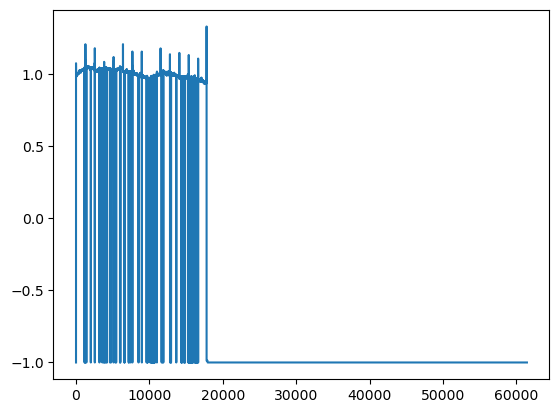

In [4]:
file_path = data_path() / "Antonio20250512" / "angcal_M3_Mar21_2"

mythendetectorspecifications = MythenDetectorSpecifications() #use default setting of 48 modules

mythendetectorspecifications.read_bad_channels_from_file(str(file_path / "bcX.txt"))

flatfield = FlatField(mythendetectorspecifications)

inverse_normalized_flatfield_data = np.loadtxt(file_path / "Flatfield_E17p5keV_T8751eV_MIX_Mar2021_open_WS.raw", dtype=np.double, usecols=1)

flatfield.inverse_normalized_flatfield = inverse_normalized_flatfield_data


plot(flatfield.inverse_normalized_flatfield)


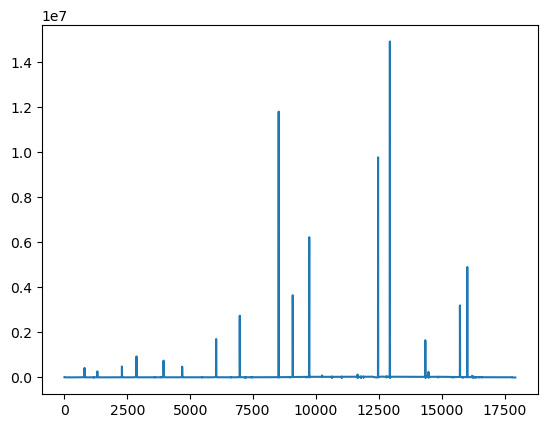

In [5]:
mythenfilereader = MythenFileReader()
frame = mythenfilereader.read_frame(str(file_path / "ang1dnSi0p3mm_0170.h5")) #TODO how to pass Posix path to pybind

plot(frame.photon_counts)

In [ ]:

anglecalibration = AngleCalibration(mythendetectorspecifications, flatfield) 

anglecalibration.read_initial_calibration_from_file(str(file_path / "angcal_Mar2021_P10.off"))


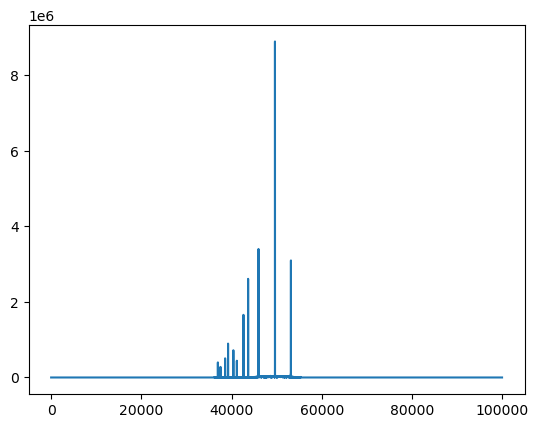

In [7]:
redistributed_photon_counts = anglecalibration.redistribute_photon_counts_to_fixed_angle_width_bins(frame)
plot(redistributed_photon_counts)

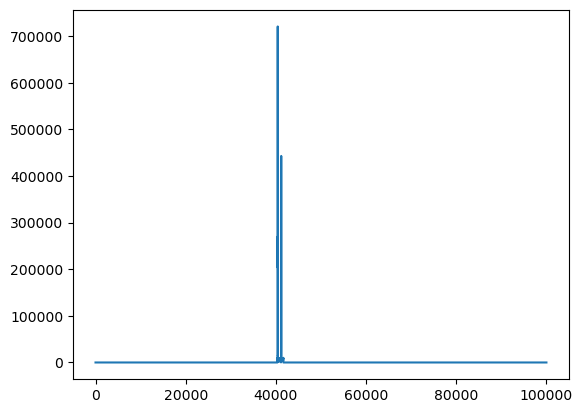

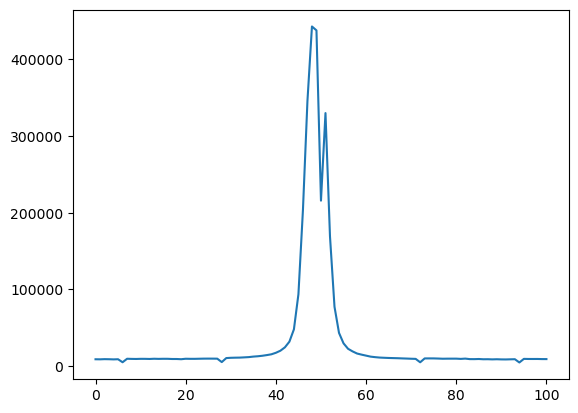

In [8]:
anglecalibration.base_peak_angle = -31.73 # random base peak from visualization 

#plot for module 3
redistributed_photon_counts = anglecalibration.redistribute_photon_counts_to_fixed_angle_width_bins(frame, 3)
plot(redistributed_photon_counts)

#plot base peak for module 3
redistributed_photon_counts = anglecalibration.redistributed_photon_counts_in_base_peak_ROI(frame, 3)
plot(redistributed_photon_counts)


In [ ]:
file_list = [str(file_path) + "/ang1dnSi0p3mm_" + f"{i:04}" + ".h5" for i in range(0,1001)]

#calibrate for module 3
anglecalibration.calibrate(file_list, -31.73, 3) # careful should only be run without ANGCAL_PLOT enabled

/home/mazzol_a/Documents/VariaMay2025/Antonio20250512/angcal_M3_Mar21_2/ang1dnSi0p3mm_0000.h5
